# Импортируем библиотеки

In [14]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Считываем файл

In [15]:
ds_salaries = pd.read_csv('data-10.2/ds_salaries.csv')
ds_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


![Снимок экрана 2025-01-03 180353.png](<attachment:Снимок экрана 2025-01-03 180353.png>)
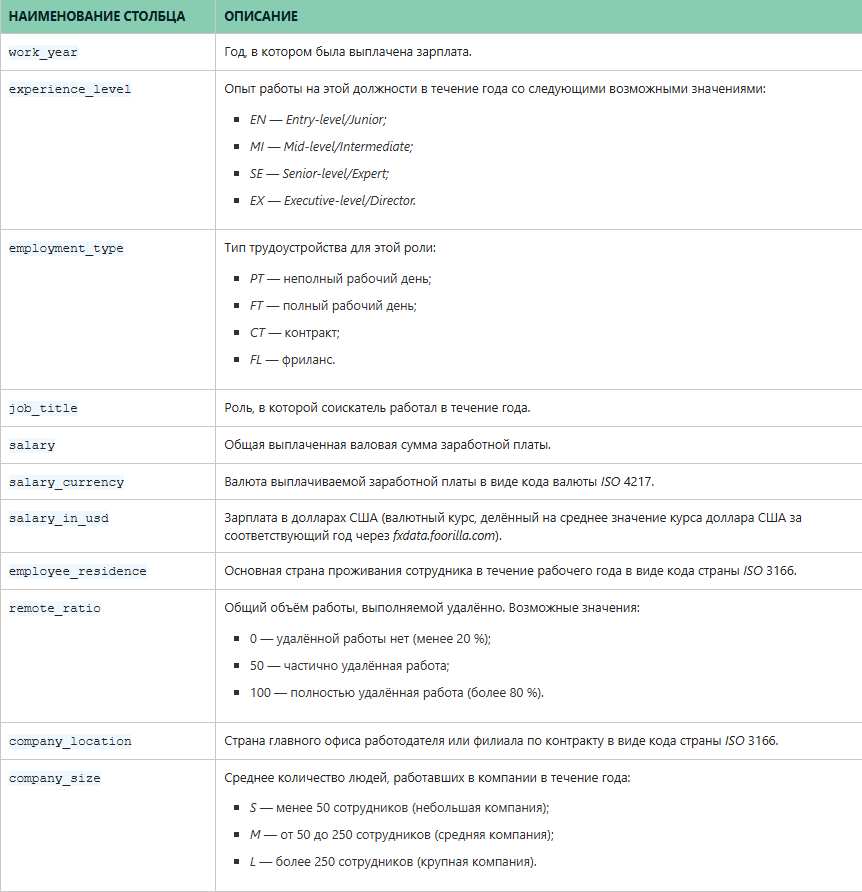

# Анализируем данные

In [16]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


# Проверяем на наличие дубликатов

In [17]:
print('Количество дубликатов: {}'.format(ds_salaries[ds_salaries.duplicated()].shape[0]))

# Удаляем дубликаты:
ds_salaries = ds_salaries.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(ds_salaries.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


In [18]:
ds_salaries = ds_salaries.drop(columns=['Unnamed: 0'])  # Удаляем неинформативный признак (столбец)
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Распределение уровня зарплаты от года

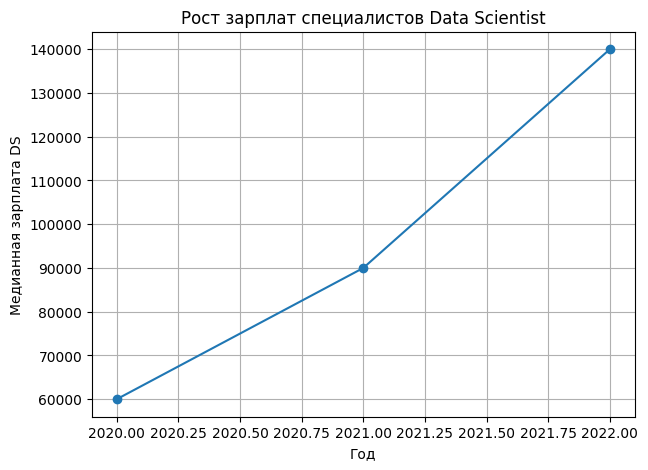

In [19]:
# Фильтрация данных по году и должности
filtered_data = ds_salaries[(ds_salaries['job_title'] == 'Data Scientist') & (ds_salaries['work_year'].notnull())]

# Расчёт среднего значения зарплат для каждого года
grouped_by_year = filtered_data.groupby('work_year')['salary'].median()

# Построение графика
plt.figure(figsize=(7, 5))
plt.plot(grouped_by_year, marker='o')
plt.title('Рост зарплат специалистов Data Scientist')
plt.xlabel('Год')
plt.ylabel('Медианная зарплата DS')
plt.grid(True)
plt.show()

* На графике мы видим что с 2020 года по 2022 год зарплата DS растет

# Размера зарплаты Data Scientist и Data Engineer в 2022 году

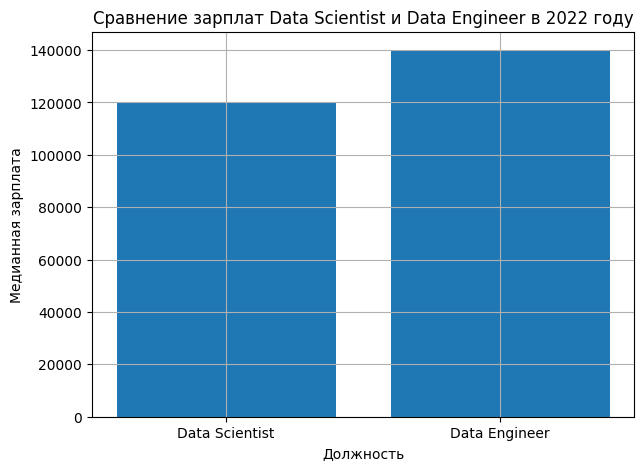

In [20]:
# Фильтрация данных по году и должности
filtered_data = ds_salaries[(ds_salaries['job_title'].isin(['Data Scientist', 'Data Engineer'])) & (ds_salaries['work_year'] == 2022)]

# Расчёт среднего значения зарплат для каждой группы
grouped_by_job = filtered_data.groupby('job_title')['salary'].median()

# Построение графика
plt.figure(figsize=(7, 5))
plt.bar(['Data Scientist', 'Data Engineer'], grouped_by_job)
plt.title('Сравнение зарплат Data Scientist и Data Engineer в 2022 году')
plt.xlabel('Должность')
plt.ylabel('Медианная зарплата')
plt.grid(True)
plt.show()

* По графику видно что зарплата в 2022 году у DE выше чем у DS

# Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров

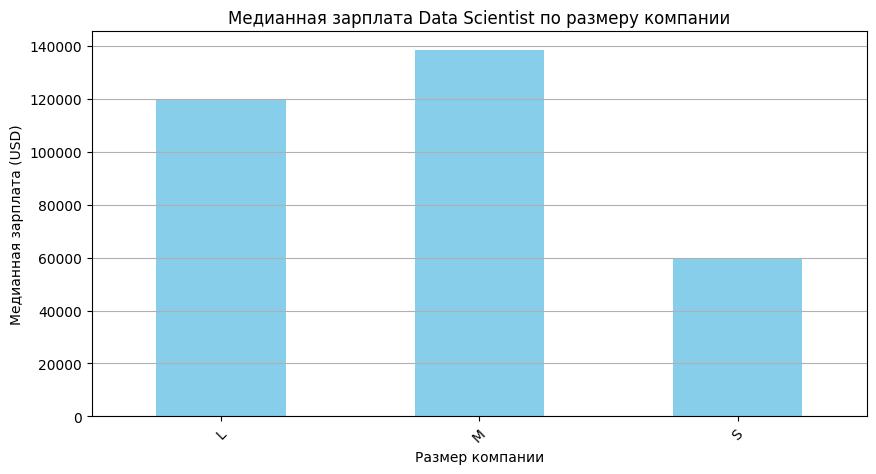

In [21]:
filtered_data = ds_salaries[ds_salaries['job_title'] == 'Data Scientist']

# Расчёт медианной зарплаты для каждой группы по размеру компании
grouped_by_size = filtered_data.groupby('company_size')['salary'].median()

# Построение графика
plt.figure(figsize=(10, 5))
grouped_by_size.plot(kind='bar', color='skyblue')
plt.title('Медианная зарплата Data Scientist по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Медианная зарплата (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

* На графике видно что размер компании влияет и на размер зарплаты

# Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании

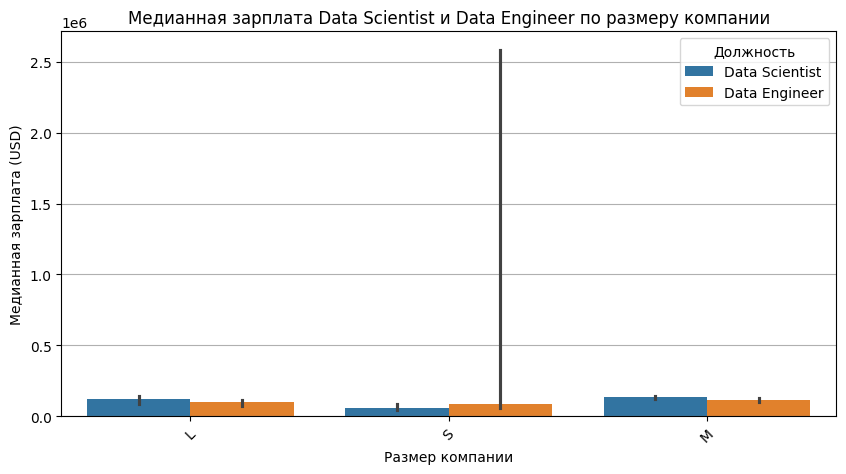

In [22]:
# Фильтрация данных
filtered_data = ds_salaries[ds_salaries['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Построение графика с использованием Seaborn для лучшей визуализации
plt.figure(figsize=(10, 5))
sns.barplot(data=filtered_data, 
            x='company_size', 
            y='salary', 
            hue='job_title', 
            estimator=lambda x: np.median(x))
plt.title('Медианная зарплата Data Scientist и Data Engineer по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Медианная зарплата (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Должность')
plt.show()

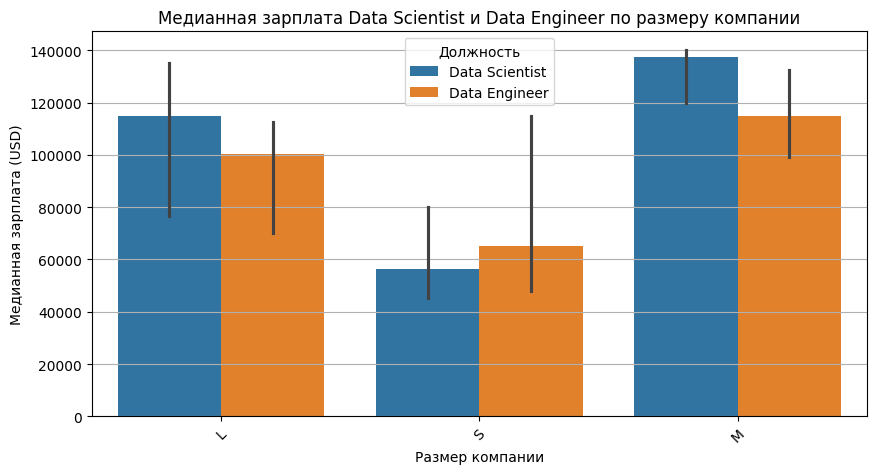

In [23]:
# Фильтрация данных
filtered_data = ds_salaries[ds_salaries['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Определение границ для выбросов на основе IQR
Q1 = filtered_data['salary'].quantile(0.25)
Q3 = filtered_data['salary'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Убираем выбросы
filtered_data = filtered_data[(filtered_data['salary'] >= lower_bound) & (filtered_data['salary'] <= upper_bound)]

# Построение графика с использованием Seaborn для лучшей визуализации
plt.figure(figsize=(10, 5))
sns.barplot(data=filtered_data, 
            x='company_size', 
            y='salary', 
            hue='job_title', 
            estimator=lambda x: np.median(x))
plt.title('Медианная зарплата Data Scientist и Data Engineer по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Медианная зарплата (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Должность')
plt.show()

* На данном графике видно что медианная зарплата у DS выше в компаниях среднего и большого размера. Также нам пришлось определить границы для выброса, так как у DE в маленькой компании есть аномальный выброс по уровню з/п

# Влияние уровня зарплаты от опыта работы

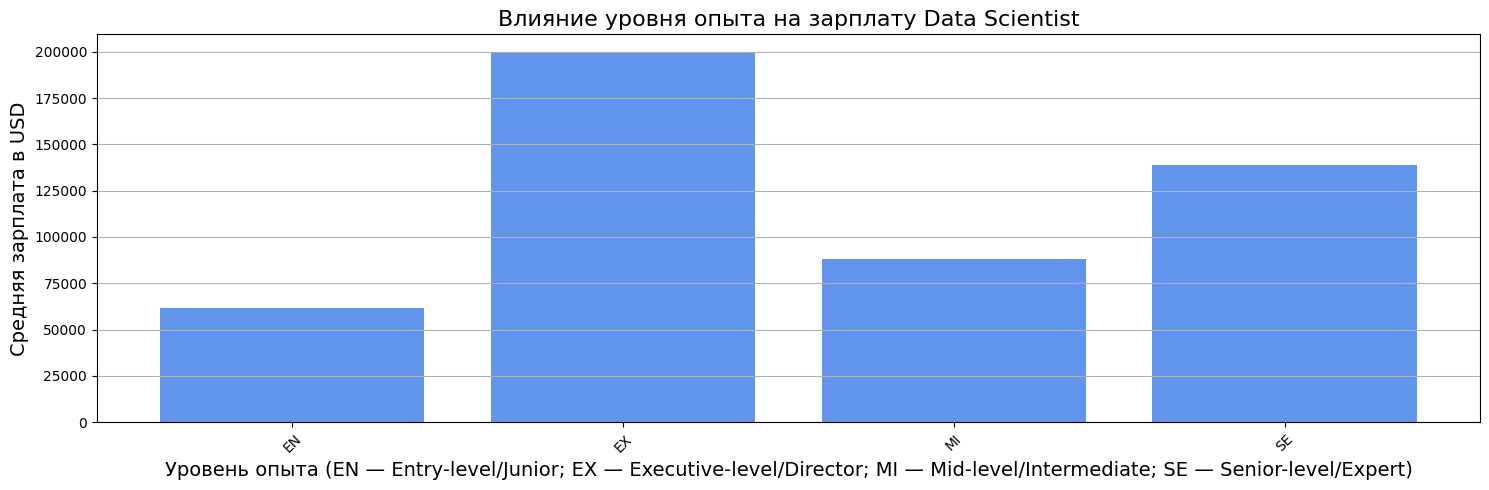

In [24]:
# Группируем данные по уровню опыта и вычисляем среднюю зарплату
average_salary = ds_salaries.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Построим график
plt.figure(figsize=(15, 5))
plt.bar(average_salary['experience_level'], average_salary['salary_in_usd'], color='cornflowerblue')
plt.xlabel('Уровень опыта (EN — Entry-level/Junior; EX — Executive-level/Director; MI — Mid-level/Intermediate; SE — Senior-level/Expert)', fontsize=14)
plt.ylabel('Средняя зарплата в USD', fontsize=14)
plt.title('Влияние уровня опыта на зарплату Data Scientist', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Показываем график
plt.tight_layout()
plt.show()

* На данном графике видно что на уровень з/п также влияет опыт работы

# Проверяем как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров

Формулировка гипотез:
   - Нулевая гипотеза (H0): Нет значимых различий в зарплатах Data Scientist между различными размерами компаний.
   - Альтернативная гипотеза (H1): Существуют значимые различия в зарплатах Data Scientist между различными размерами компаний.

In [25]:
# Фильтрация данных для профессии 'Data Scientist'
data_scientist_salaries = ds_salaries[ds_salaries['job_title'] == 'Data Scientist']

# Группируем данные по размерам компаний
grouped_salaries = data_scientist_salaries.groupby('company_size')['salary_in_usd'].apply(list)

# Проверка на равенство дисперсий
result = stats.levene(*grouped_salaries)
p = result.pvalue  # Используем pvalue для получения p-значения
print('p-value для теста Левена = {:.3f}'.format(p))

# Уровень значимости
alpha = 0.05

# Интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# Проводим ANOVA-тест
_, p_value = stats.f_oneway(*grouped_salaries)

# Вывод результатов
print("P-Value для ANOVA:", p_value)

# Интерпретация результатов
if p_value < alpha:
    print("Существует значимая разница в зарплатах Data Scientist между разными размерами компаний.")
else:
    print("Нет значимых различий в зарплатах Data Scientist между разными размерами компаний.")

p-value для теста Левена = 0.056
Дисперсии одинаковы, мы можем использовать тест ANOVA
P-Value для ANOVA: 5.271295955387072e-06
Существует значимая разница в зарплатах Data Scientist между разными размерами компаний.


* Данный тест показывает нам как и на графике что существует разница зарплаты в зависимости от размера компании.

# Зависимость между уровнем опыта (experience_level) и типом занятости (employment_type).

Гипотезы:

- Нулевая гипотеза (H0): Уровень опыта не зависит от типа занятости. 
- Альтернативная гипотеза (H1): Уровень опыта зависит от типа занятости.

Мы анализируем, есть ли статистически значимая зависимость между уровнем опыта сотрудников (например, Junior, Mid-level, Senior) и их типом занятости (например, Full-Time, Part-Time и т.д.) в контексте переменной

In [26]:
# Создание сводной таблицы
contingency_table = pd.crosstab(ds_salaries['experience_level'], ds_salaries['employment_type'])

# Проведение теста на независимость
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Вывод результатов
print(f'p-value: {p:.3f}')  # Исправлено, чтобы правильно вывести значение p

# Установка уровня значимости
alpha = 0.05

# Интерпретация результатов
if p < alpha:
    print("p-значение меньше 0.05, мы отклоняем нулевую гипотезу и заключаем, что существует связь между уровнем опыта и типом занятости.")
else:
    print("p-значение больше 0.05, нет достаточных оснований для отклонения нулевой гипотезы, и мы можем сказать, что уровень опыта и тип занятости независимы.")

p-value: 0.000
p-значение меньше 0.05, мы отклоняем нулевую гипотезу и заключаем, что существует связь между уровнем опыта и типом занятости.


# Результаты иследования:

* Имеется взаимосвязь между опытом работы и уровнем з/п
* Также имеется взаимосвязь между типом занятости и уровнем з/п
* Также существует значимая разница по зарплатам в компаниях разных размеров (малая, средняя, большая)
* С каждым годом зарплата увеличивается для специалистов DS это говорит о том что компаниям требуются много работников данной сферы